# Example: Naive Bayes on the Iris Dataset

In [24]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

In [25]:
#load the iris dataset from SKLearn
iris = datasets.load_iris()
x = iris.data #array of the data
y = iris.target #array of labels (i.e answers) of each data entry
#getting label names i.e the three flower species
y_names = iris.target_names

In [48]:
print(x[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [50]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
print(y_names)

['setosa' 'versicolor' 'virginica']


In [32]:
#taking random indices to split the dataset into train and test
test_ids = np.random.permutation(len(x))

#splitting data and labels into train and test
#keeping last 10 entries for testing, rest for training

foo=75
x_train = x[test_ids[:-foo]]
x_test = x[test_ids[-foo:]]

y_train = y[test_ids[:-foo]]
y_test = y[test_ids[-foo:]]

In [33]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(150,)
(75,)
(75,)


In [34]:
#Naive Bayes Classifier
clf = GaussianNB()

#training (fitting) the classifier with the training set
clf.fit(x_train, y_train)

#predictions on the test dataset
pred = clf.predict(x_test)

print(pred) #predicted labels i.e flower species
print(y_test) #actual labels
print("Accuracy:", (accuracy_score(pred, y_test))*100) #prediction accuracy

#y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
#print("Number of mislabeled points out of a total %d points : %d"
#      % (iris.data.shape[0],(iris.target != y_pred).sum()))


[1 1 1 0 2 1 1 1 2 2 1 1 1 2 0 1 1 1 2 2 0 1 2 0 0 2 0 0 0 2 2 1 1 2 1 2 0
 1 0 2 0 0 0 0 1 0 2 0 0 1 0 2 2 1 0 2 0 0 0 1 2 1 2 0 1 0 1 1 0 1 2 0 1 2
 2]
[1 2 1 0 2 1 1 1 2 2 1 1 1 2 0 1 1 1 2 2 0 2 1 0 0 2 0 0 0 2 2 1 1 2 1 2 0
 1 0 2 0 0 0 0 1 0 2 0 0 1 0 2 2 1 0 2 0 0 0 1 2 1 1 0 1 0 1 1 0 1 2 0 1 2
 2]
Accuracy: 94.66666666666667


# Example: K-means clustering on the Iris Dataset 

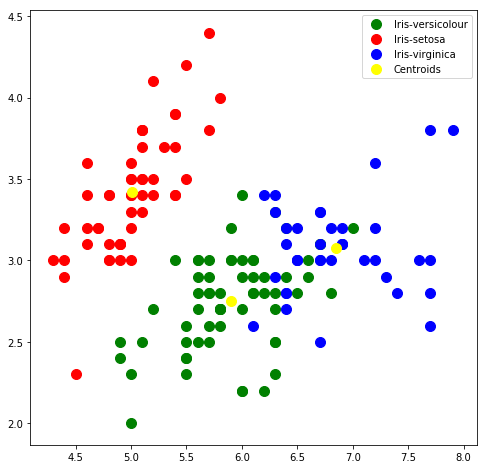

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


#Visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
